In [2]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

File ‘spa-eng.zip’ already there; not retrieving.



In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from transformers import pipeline


In [4]:
!unzip -nq spa-eng.zip

In [5]:
ls spa-eng


_about.txt  spa.txt


In [6]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [7]:
eng2spa={}
for line in open('spa-eng/spa.txt'):
  line=line.rstrip()
  eng,spa=line.split('\t')
  if eng not in eng2spa:
    eng2spa[eng]=[]
  eng2spa[eng].append(spa)

In [8]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [9]:
from nltk.translate.bleu_score import sentence_bleu,SmoothingFunction
from nltk.tokenize import RegexpTokenizer


In [10]:
tokenizer=RegexpTokenizer(r'\w+')

In [11]:
tokenizer.tokenize('¿Qué me cuentas?'.lower())

['qué', 'me', 'cuentas']

In [12]:
tokens=tokenizer.tokenize('¿Qué me cuentas?'.lower())
sentence_bleu([tokens],tokens)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [13]:
sentence_bleu([['hi']],['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [14]:
smoother=SmoothingFunction()
sentence_bleu(['hi'],'hi',smoothing_function=smoother.method4)

0.2213885886251307

In [15]:
sentence_bleu([[1,2,3,4]],[1,2,3,4])

1.0

In [16]:
eng2spa_tokens={}
for eng,spa_list in eng2spa.items():
  spa_list_tokens=[]
  for text in spa_list:
    tokens=tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng]=spa_list_tokens


In [17]:
!pip install transformers sentencepiece  transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install sentencepiece


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
translator=pipeline('translation', model='Helsinki-NLP/opus-mt-en-es')

In [21]:
translator('I like eggs and ham')

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [24]:
eng_phrases=list(eng2spa.keys())
len(eng_phrases)

102904

In [53]:
eng_phrases_subset=eng_phrases[20_000:21_000]

In [54]:
#27 min for 10k phrases on GPU
translations=translator(eng_phrases_subset)

In [55]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [56]:
scores=[]
for eng,pred in zip(eng_phrases_subset,translations):
  matches=eng2spa_tokens[eng]

  #tokenize translation
  spa_pred=tokenizer.tokenize(pred['translation_text'].lower())
  score=sentence_bleu(matches,spa_pred)
  scores.append(score)


(array([649.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   2.,   2.,   3.,   0.,   0.,   0.,   0.,
         16.,   0.,   0.,   0.,   3.,   7.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 313.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

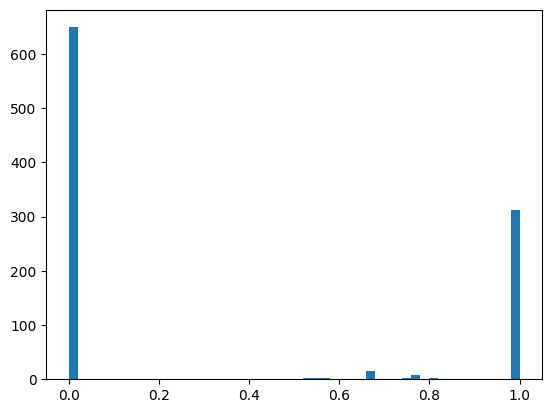

In [57]:
import matplotlib.pyplot as plt
plt.hist(scores,bins=50)

In [58]:
import numpy as np
np.mean(scores)

0.3383504014386889

In [63]:
np.random.seed(1)
def print_random_translation():
  i=np.random.choice(len(eng_phrases_subset))
  eng=eng_phrases_subset[i]
  print("EN: ",eng)

  translation=translations[i]['translation_text']
  print('ES translation: ',translation)
  matches=eng2spa[eng]
  print("matches: ",matches)


In [64]:
print_random_translation()


EN:  Tom isn't that young.
ES translation:  Tom no es tan joven.
matches:  ['Tom no es tan joven.']


In [65]:
print_random_translation()


EN:  Tom's Mary's brother.
ES translation:  Tom es el hermano de Mary.
matches:  ['Tom es el hermano de Mary.']
